In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Logistic Regression (for Binary Classification)

Even though Logistic Regression has the term "regression", it is actually a method for classification.

* In "normal" regression problems, the targets are real-valued number, $y\in \mathbb{R}$.

* In a classification problem, the targets are ''categories'' (i.e., discrete values).

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# We are creating a new dataset from the iris dataset, to classify Virginica versus Not-Virginica based on only 1 feature
X = iris["data"][:,3:]
y = (iris["target"]==2).astype(np.int) # Binary Classification, we want to classify Virginica versus Not-Virginica

In [7]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# Create data for plotting
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)  # predict_proba: predict the probability that a training example belongs to the class Virginica (y==1).

In [9]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

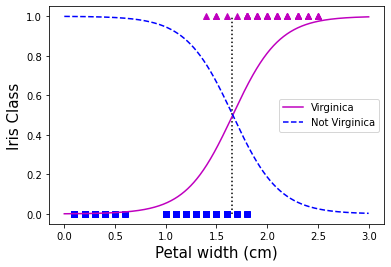

In [10]:
plt.figure()
idx_yes = (y==1)
plt.plot(X[idx_yes],[1.0]*len(X[idx_yes]), "m^")
idx_no = (y==0)
plt.plot(X[idx_no],[0.0]*len(X[idx_no]), "bs")

plt.plot(X_new, y_proba[:,1], "m-", label="Virginica")  # y == 1: class Virginica
plt.plot(X_new, y_proba[:,0], "b--", label="Not Virginica")  # y == 0: class Non-Virginica
plt.xlabel("Petal width (cm)", fontsize=15)
plt.ylabel("Iris Class", fontsize=15)
plt.vlines(x=1.65,ymin=0.0, ymax=1.0, ls='dotted')
plt.legend()

$\texttt{score}=w_0 + w_1 x$

* $x$: is the petal width (our only feature).

In [11]:
log_reg.predict_proba([[0.4], [1.3], [1.65], [2.0], [2.5]])

array([[0.99577067, 0.00422933],
       [0.82659692, 0.17340308],
       [0.51127777, 0.48872223],
       [0.18672067, 0.81327933],
       [0.02563061, 0.97436939]])

In [12]:
log_reg.predict([[0.4], [1.3], [1.65], [2.0], [2.5]])

array([0, 0, 0, 1, 1])

### Use 2 features for Logistic Regression to do Classification

In [13]:
X = iris["data"][:,(2,3)]
y = (iris["target"] == 2).astype(np.int)

In [14]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
x0, x1 = np.meshgrid(
            np.linspace(1,7,500).reshape(-1,1),
            np.linspace(0,2.5,200).reshape(-1,1)
)  # to create a grid of numbers

In [16]:
# Create data for plotting
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

(3.0, 7.0, 0.5, 2.7)

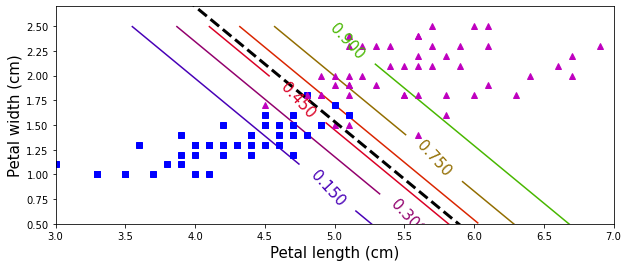

In [17]:
plt.figure(figsize=(10,4))
plt.plot(X[y==0,0], X[y==0,1], "bs")
plt.plot(X[y==1,0], X[y==1,1], "m^")
plt.xlabel("Petal length (cm)", fontsize=15)
plt.ylabel("Petal width (cm)", fontsize=15)

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=15)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['yellow', 'cyan'])
zz1 = log_reg.predict(X_new).reshape(x0.shape)
#plt.contourf(x0, x1, zz1, cmap=custom_cmap)

lr = np.array([3, 7])
boundary = -(log_reg.coef_[0][0] * lr + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(lr, boundary, 'k--', linewidth=3)
plt.axis([3, 7, 0.5, 2.7])

In [18]:
print(log_reg.intercept_, log_reg.coef_)

[-17.5481106] [[2.77762524 2.38552012]]


$x_1$: Petal length (cm)

$x_2$: Petal width (cm)

$w_0 + w_1 x_1 + w_2 x_2 = 0$

$x_2 = \frac{-(w_1x_1 + w0)}{w_2}$

# Softmax Regression (for multi-class Classification)

In [19]:
X = iris["data"][:,(2,3)] # petal length, petal width
y = iris["target"]

In [20]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
print(softmax_reg.intercept_, softmax_reg.coef_)

[ 18.87514796   6.3844344  -25.25958236] [[-4.58614563 -2.24129385]
 [ 0.16068263 -2.15860167]
 [ 4.425463    4.39989552]]


In [22]:
x0, x1 = np.meshgrid(
            np.linspace(0,8,500).reshape(-1,1),
            np.linspace(0,3.5,200).reshape(-1,1)
)  # to create a grid of numbers
# Create data for plotting
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_predict.reshape(x0.shape)
zz = y_proba[:,1].reshape(x0.shape)  # Probability contour that an iris flower belongs to Versicolor

In [23]:
y_proba

array([[9.99996239e-01, 3.76140758e-06, 6.80030712e-20],
       [9.99995941e-01, 4.05882856e-06, 7.85729317e-20],
       [9.99995620e-01, 4.37976703e-06, 9.07856856e-20],
       ...,
       [7.73770362e-23, 1.03687990e-11, 1.00000000e+00],
       [6.69680312e-23, 9.68354416e-12, 1.00000000e+00],
       [5.79592787e-23, 9.04357657e-12, 1.00000000e+00]])

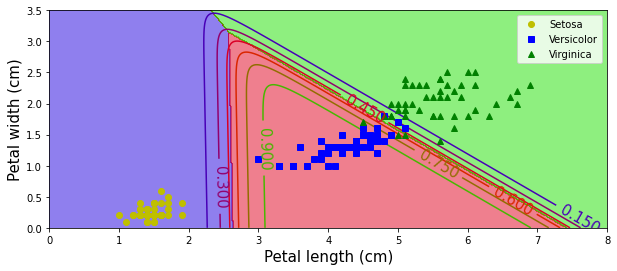

In [24]:
plt.figure(figsize=(10,4))
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Virginica")


plt.contourf(x0, x1, zz1, cmap=plt.cm.brg, alpha=0.5)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=15)
plt.xlabel("Petal length (cm)", fontsize=15)
plt.ylabel("Petal width (cm)", fontsize=15)
plt.legend()